**Exercise-01**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = {
    'Province': ['Punjab', 'Sindh', 'Khyber Pakhtunkhwa', 'Balochistan'],

    'Population (millions)': [127.69, np.nan, 40.86, 14.89],

    'Literacy Rate (%)': [66.3, 61.8, 55.1, np.nan],
    'Region': ['East', 'South', 'North', 'West']
}

df = pd.DataFrame(data)
print("--- Initial DataFrame with Missing Values (NaN) ---\n")
print(df)

--- Initial DataFrame with Missing Values (NaN) ---

             Province  Population (millions)  Literacy Rate (%) Region
0              Punjab                 127.69               66.3   East
1               Sindh                    NaN               61.8  South
2  Khyber Pakhtunkhwa                  40.86               55.1  North
3         Balochistan                  14.89                NaN   West


In [ ]:
df_cleaned = df.dropna(subset=['Population (millions)']).copy()

print(df_cleaned)


median_lit_rate = df_cleaned['Literacy Rate (%)'].median() # Median of [66.3, 55.1] is 60.7


df['Literacy Rate (%)'].fillna(median_lit_rate, inplace=True)
df['Population (millions)'].fillna(df['Population (millions)'].median(), inplace=True)

print(f"Median Literacy Rate used for imputation: {median_lit_rate:.2f}")

print(df)

             Province  Population (millions)  Literacy Rate (%) Region
0              Punjab                 127.69               66.3   East
2  Khyber Pakhtunkhwa                  40.86               55.1  North
3         Balochistan                  14.89                NaN   West
Median Literacy Rate used for imputation: 60.70
             Province  Population (millions)  Literacy Rate (%) Region
0              Punjab                 127.69               66.3   East
1               Sindh                  40.86               61.8  South
2  Khyber Pakhtunkhwa                  40.86               55.1  North
3         Balochistan                  14.89               60.7   West


/tmp/ipython-input-3107432938.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Literacy Rate (%)'].fillna(median_lit_rate, inplace=True)
/tmp/ipython-input-3107432938.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
le = LabelEncoder()
df['Region_LabelEncoded'] = le.fit_transform(df['Region'])

print(df[['Province', 'Region', 'Region_LabelEncoded']])



df_encoded = pd.get_dummies(df, columns=['Region'], prefix='Region')


print(df_encoded[['Province', 'Region_East', 'Region_North', 'Region_South', 'Region_West']])


             Province Region  Region_LabelEncoded
0              Punjab   East                    0
1               Sindh  South                    2
2  Khyber Pakhtunkhwa  North                    1
3         Balochistan   West                    3
             Province  Region_East  Region_North  Region_South  Region_West
0              Punjab         True         False         False        False
1               Sindh        False         False          True        False
2  Khyber Pakhtunkhwa        False          True         False        False
3         Balochistan        False         False         False         True


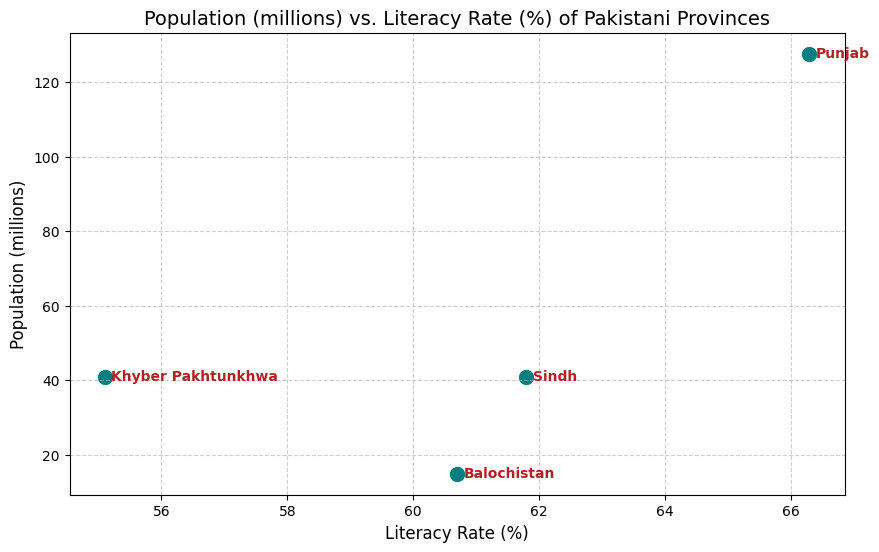

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Literacy Rate (%)'], df['Population (millions)'], color='teal', s=100)

for i, row in df.iterrows():
    plt.annotate(row['Province'],
                 (row['Literacy Rate (%)'] + 0.1, row['Population (millions)'] - 1),
                 fontsize=10,
                 color='firebrick',
                 fontweight='bold')

plt.title('Population (millions) vs. Literacy Rate (%) of Pakistani Provinces', fontsize=14)
plt.xlabel('Literacy Rate (%)', fontsize=12)
plt.ylabel('Population (millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



Q1 = df['Literacy Rate (%)'].quantile(0.25)
Q3 = df['Literacy Rate (%)'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:

outliers = df[(df['Literacy Rate (%)'] < lower_bound) | (df['Literacy Rate (%)'] > upper_bound)]

print("--- 4b. Outlier Detection (Literacy Rate) using IQR Method ---")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print("\nProvinces identified as outliers in Literacy Rate:\n")
if outliers.empty:
    print("No provinces were identified as outliers in Literacy Rate by the IQR method.")
else:
    print(outliers[['Province', 'Literacy Rate (%)']])

--- 4b. Outlier Detection (Literacy Rate) using IQR Method ---
Q1 (25th percentile): 59.30
Q3 (75th percentile): 62.92
IQR: 3.62
Lower Bound: 53.86
Upper Bound: 68.36

Provinces identified as outliers in Literacy Rate:

No provinces were identified as outliers in Literacy Rate by the IQR method.


In [ ]:
!pip install opendatasets

**Activity-02**

**Importing libraries**

**Exercise-02**

Exercise-03

Exercise-04

Activity-04

Exercise-05

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Manual Data Creation**

In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'London', 'Paris']
}
df = pd.DataFrame(data)
display(df)

Name  Age      City
0    Alice   25  New York
1      Bob   30    London
2  Charlie   35     Paris

**Reading Iris CSV and Performing Operations**

In [ ]:
df = pd.read_csv('Iris.csv')
display(df)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

**Droping Columns and Rows on axis=0, axis=1**


In [ ]:
df.dropna()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

*Reading Time series Data from link *

Activity-03

In [ ]:
df_jason = pd.read_csv('time-series-19-covid-combined.csv')
display(df_jason)

Date Country/Region Province/State  Confirmed  Recovered  Deaths
0       2020-01-22    Afghanistan            NaN          0        0.0       0
1       2020-01-23    Afghanistan            NaN          0        0.0       0
2       2020-01-24    Afghanistan            NaN          0        0.0       0
3       2020-01-25    Afghanistan            NaN          0        0.0       0
4       2020-01-26    Afghanistan            NaN          0        0.0       0
...            ...            ...            ...        ...        ...     ...
231739  2022-04-12       Zimbabwe            NaN     247094        0.0    5460
231740  2022-04-13       Zimbabwe            NaN     247160        0.0    5460
231741  2022-04-14       Zimbabwe            NaN     247208        0.0    5462
231742  2022-04-15       Zimbabwe            NaN     247237        0.0    5462
231743  2022-04-16       Zimbabwe            NaN     247237        0.0    5462

[231744 rows x 6 columns]

In [ ]:
pakistan_data = df_jason[df_jason['Country/Region'] == 'Pakistan']
display(pakistan_data)

Date Country/Region Province/State  Confirmed  Recovered  Deaths
168912  2020-01-22       Pakistan            NaN          0        0.0       0
168913  2020-01-23       Pakistan            NaN          0        0.0       0
168914  2020-01-24       Pakistan            NaN          0        0.0       0
168915  2020-01-25       Pakistan            NaN          0        0.0       0
168916  2020-01-26       Pakistan            NaN          0        0.0       0
...            ...            ...            ...        ...        ...     ...
169723  2022-04-12       Pakistan            NaN    1526829        0.0   30362
169724  2022-04-13       Pakistan            NaN    1526952        0.0   30362
169725  2022-04-14       Pakistan            NaN    1526952        0.0   30362
169726  2022-04-15       Pakistan            NaN    1527151        0.0   30363
169727  2022-04-16       Pakistan            NaN    1527248        0.0   30363

[816 rows x 6 columns]

In [ ]:
# Fill missing numerical values with the median
numerical_cols = pakistan_data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    median_val = pakistan_data[col].median()
    pakistan_data[col].fillna(median_val, inplace=True)

# Fill missing categorical values with a placeholder
categorical_cols = pakistan_data.select_dtypes(include='object').columns
for col in categorical_cols:
    pakistan_data[col].fillna('Unknown', inplace=True)


print("\nMissing values after handling:")
print(pakistan_data.isnull().sum())

display(pakistan_data.head())


Missing values after handling:
Date              0
Country/Region    0
Province/State    0
Confirmed         0
Recovered         0
Deaths            0
dtype: int64


/tmp/ipython-input-4285631703.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pakistan_data[col].fillna(median_val, inplace=True)
/tmp/ipython-input-4285631703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pakistan_data[col].fillna(median_val, inplace=True)
/tmp/ipython-input-4285631703.py:10: FutureWarning: A value is trying to be s

Date Country/Region Province/State  Confirmed  Recovered  Deaths
168912  2020-01-22       Pakistan        Unknown          0        0.0       0
168913  2020-01-23       Pakistan        Unknown          0        0.0       0
168914  2020-01-24       Pakistan        Unknown          0        0.0       0
168915  2020-01-25       Pakistan        Unknown          0        0.0       0
168916  2020-01-26       Pakistan        Unknown          0        0.0       0

/tmp/ipython-input-3225510339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pakistan_data['Date'] = pd.to_datetime(pakistan_data['Date'])


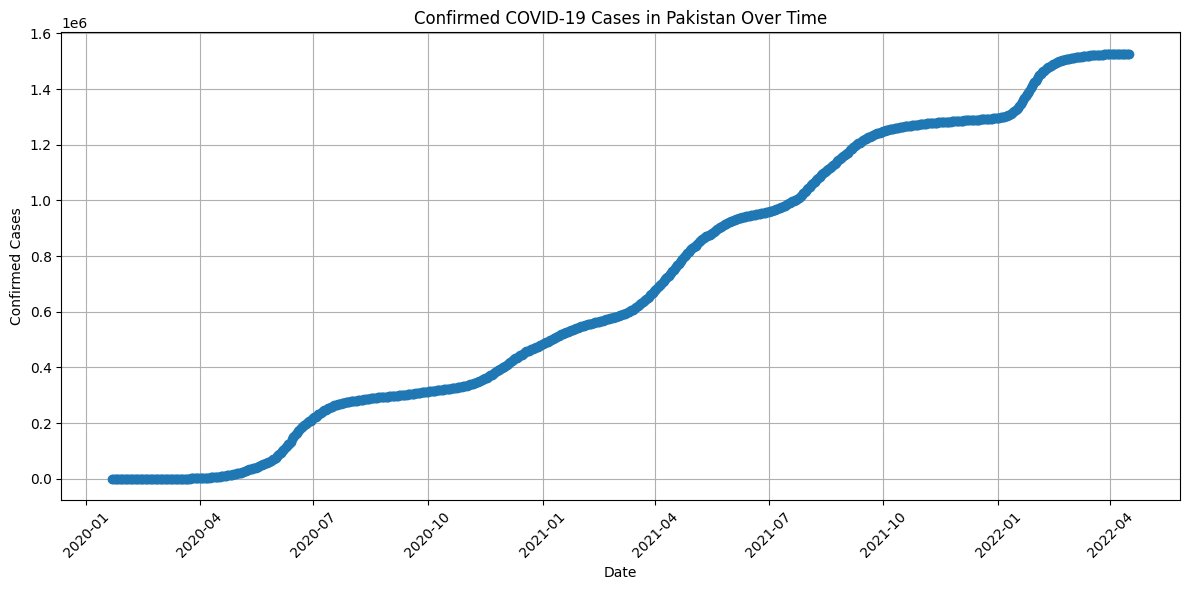

In [ ]:
pakistan_data['Date'] = pd.to_datetime(pakistan_data['Date'])

plt.figure(figsize=(12, 6))
plt.plot(pakistan_data['Date'], pakistan_data['Confirmed'], marker='o', linestyle='-')
plt.title('Confirmed COVID-19 Cases in Pakistan Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Q1_confirmed = pakistan_data['Confirmed'].quantile(0.25)
Q3_confirmed = pakistan_data['Confirmed'].quantile(0.75)
IQR_confirmed = Q3_confirmed - Q1_confirmed

lower_bound_confirmed = Q1_confirmed - 1.5 * IQR_confirmed
upper_bound_confirmed = Q3_confirmed + 1.5 * IQR_confirmed

outliers_confirmed = pakistan_data[(pakistan_data['Confirmed'] < lower_bound_confirmed) | (pakistan_data['Confirmed'] > upper_bound_confirmed)]

print("--- Outlier Detection (Confirmed Cases) using IQR Method ---")
print(f"Q1 (25th percentile): {Q1_confirmed:.2f}")
print(f"Q3 (75th percentile): {Q3_confirmed:.2f}")
print(f"IQR: {IQR_confirmed:.2f}")
print(f"Lower Bound: {lower_bound_confirmed:.2f}")
print(f"Upper Bound: {upper_bound_confirmed:.2f}")
print("\nDates identified as outliers in Confirmed Cases:\n")
if outliers_confirmed.empty:
    print("No data points were identified as outliers in Confirmed Cases by the IQR method.")
else:
    print(outliers_confirmed[['Date', 'Confirmed']])

--- Outlier Detection (Confirmed Cases) using IQR Method ---
Q1 (25th percentile): 286485.75
Q3 (75th percentile): 1237333.00
IQR: 950847.25
Lower Bound: -1139785.12
Upper Bound: 2663603.88

Dates identified as outliers in Confirmed Cases:

No data points were identified as outliers in Confirmed Cases by the IQR method.


Reading CSV data of cars and performing different operations

Activity-04

In [ ]:
df_txt = pd.read_csv('cars.csv')
display(df_txt)

Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    1328  105
20        Ford      Mondeo    1600    1584   94
21        Opel    Insignia    2000    1428   99
22    Mercedes     C-Class    2100    1365   99
23       Skoda     Octavia    1600    1415   99
24       Volvo         S60    2000    1415   99
25    Mercedes         CLA    1500    1465  102
26        Audi          A4    2000    1490  104
27        Audi          A6    2000    1725  114
28       Volvo         V70    1600    1523  109
29         BMW           5    2000    1705  114
30    Mercedes     E-Class    2100    1605  115
31       Volvo        XC70    2000    1746  117
32        Ford       B-Max    1600    1235  104
33         BMW         216    1600    1390  108
34        Opel      Zafira    1600    1405  109
35    Mercedes         SLK    2500    1395  120

Reading Students Data

In [ ]:
df_student = pd.read_csv('students.csv')
display(df_student)

Name  Marks
0    Student_1     78
1    Student_2     91
2    Student_3     68
3    Student_4     54
4    Student_5     82
5    Student_6     47
6    Student_7     60
7    Student_8     78
8    Student_9     97
9   Student_10     58
10  Student_11     62
11  Student_12     50
12  Student_13     50
13  Student_14     63
14  Student_15     92
15  Student_16     75
16  Student_17     79
17  Student_18     63
18  Student_19     42
19  Student_20     61
20  Student_21     92
21  Student_22     41
22  Student_23     63
23  Student_24     83
24  Student_25     69
25  Student_26     77
26  Student_27     41
27  Student_28     99
28  Student_29     60
29  Student_30     72
30  Student_31     51
31  Student_32     97
32  Student_33     61
33  Student_34     83
34  Student_35     64
35  Student_36     88
36  Student_37     66
37  Student_38     98
38  Student_39     81
39  Student_40     67
40  Student_41     99
41  Student_42     55
42  Student_43     54
43  Student_44     86
44  Student_45     90
45  Student_46     83
46  Student_47     94
47  Student_48     91
48  Student_49     96
49  Student_50     42

Reading attendance json file

In [ ]:
df_Jason=pd.read_json('attendance.json')
display(df_Jason)

Name  Attendance
0    Student_1          86
1    Student_2          56
2    Student_3          70
3    Student_4          58
4    Student_5          88
5    Student_6          67
6    Student_7          53
7    Student_8          74
8    Student_9          63
9   Student_10          99
10  Student_11          58
11  Student_12          75
12  Student_13          51
13  Student_14          69
14  Student_15          77
15  Student_16          96
16  Student_17          56
17  Student_18          93
18  Student_19          57
19  Student_20          96
20  Student_21          84
21  Student_22          63
22  Student_23          66
23  Student_24          85
24  Student_25          99
25  Student_26          89
26  Student_27          53
27  Student_28          51
28  Student_29          55
29  Student_30          91
30  Student_31          53
31  Student_32          78
32  Student_33          67
33  Student_34          75
34  Student_35          93
35  Student_36          83
36  Student_37          59
37  Student_38          85
38  Student_39          63
39  Student_40          80
40  Student_41          97
41  Student_42          64
42  Student_43          57
43  Student_44          63
44  Student_45          72
45  Student_46          89
46  Student_47          70
47  Student_48          65
48  Student_49          94
49  Student_50          67

**Reading Excel Files**

In [ ]:
df_excel=pd.read_excel('extra.xlsx')
display(df_excel)

Name  Bonus
0    Student_1      4
1    Student_2      7
2    Student_3      9
3    Student_4      8
4    Student_5      8
5    Student_6      0
6    Student_7      8
7    Student_8      6
8    Student_9      8
9   Student_10      7
10  Student_11      0
11  Student_12      7
12  Student_13      7
13  Student_14      2
14  Student_15      0
15  Student_16      7
16  Student_17      2
17  Student_18      2
18  Student_19      0
19  Student_20      4
20  Student_21      9
21  Student_22      6
22  Student_23      9
23  Student_24      8
24  Student_25      6
25  Student_26      8
26  Student_27      7
27  Student_28      1
28  Student_29      0
29  Student_30      6
30  Student_31      6
31  Student_32      7
32  Student_33      4
33  Student_34      2
34  Student_35      7
35  Student_36      5
36  Student_37      2
37  Student_38      0
38  Student_39      2
39  Student_40      4
40  Student_41      2
41  Student_42      0
42  Student_43      4
43  Student_44      9
44  Student_45      6
45  Student_46      6
46  Student_47      8
47  Student_48      9
48  Student_49      9
49  Student_50      2

Activity-04

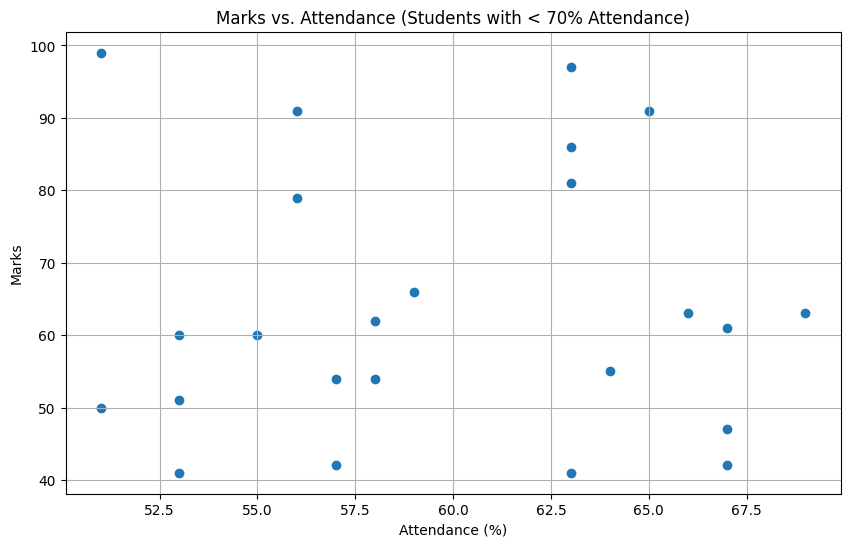

In [ ]:

merged_df = pd.merge(df_student, df_Jason, on='Name')

low_attendance_df = merged_df[merged_df['Attendance'] < 70]


plt.figure(figsize=(10, 6))
plt.scatter(low_attendance_df['Attendance'], low_attendance_df['Marks'])
plt.title('Marks vs. Attendance (Students with < 70% Attendance)')
plt.xlabel('Attendance (%)')
plt.ylabel('Marks')
plt.grid(True)
plt.show()

In [ ]:
df_student_encoded = pd.get_dummies(df_student, columns=['Name'], prefix='Name')
display(df_student_encoded.head())

Marks  Name_Student_1  Name_Student_10  Name_Student_11  Name_Student_12  \
0     78            True            False            False            False   
1     91           False            False            False            False   
2     68           False            False            False            False   
3     54           False            False            False            False   
4     82           False            False            False            False   

   Name_Student_13  Name_Student_14  Name_Student_15  Name_Student_16  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Name_Student_17  ...  Name_Student_46  Name_Student_47  Name_Student_48  \
0            False  ...            False            False            False   
1            False  ...            False            False            False   
2            False  ...            False            False            False   
3            False  ...            False            False            False   
4            False  ...            False            False            False   

   Name_Student_49  Name_Student_5  Name_Student_50  Name_Student_6  \
0            False           False            False           False   
1            False           False            False           False   
2            False           False            False           False   
3            False           False            False           False   
4            False            True            False           False   

   Name_Student_7  Name_Student_8  Name_Student_9  
0           False           False           False  
1           False           False           False  
2           False           False           False  
3           False           False           False  
4           False           False           False  

[5 rows x 51 columns]

Activity-05


In [ ]:

raw_data = {
    "Name": ["Ahsan", "Hira", "Bilal", "Zara", "Salman", "Mahnoor"],
    "Age": [25, 27, 35, 29, None, 40],
    "Salary": [50000, None, 75000, 2000000, 60000, 90000],
    "Department": ["IT", "Finance", "IT", "HR", "Finance", "IT"]
}

df = pd.DataFrame(raw_data)

df = df.replace({None: np.nan})


print(df)

      Name   Age     Salary Department
0    Ahsan  25.0    50000.0         IT
1     Hira  27.0        NaN    Finance
2    Bilal  35.0    75000.0         IT
3     Zara  29.0  2000000.0         HR
4   Salman   NaN    60000.0    Finance
5  Mahnoor  40.0    90000.0         IT


In [ ]:

median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

median_salary = df['Salary'].median()
df['Salary'].fillna(median_salary, inplace=True)


mode_department = df['Department'].mode()[0]
df['Department'].fillna(mode_department, inplace=True)



print(df)

      Name   Age     Salary Department
0    Ahsan  25.0    50000.0         IT
1     Hira  27.0    75000.0    Finance
2    Bilal  35.0    75000.0         IT
3     Zara  29.0  2000000.0         HR
4   Salman  29.0    60000.0    Finance
5  Mahnoor  40.0    90000.0         IT


/tmp/ipython-input-2092992129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-2092992129.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Creating Sample Data with Numpy

In [ ]:
np.random.seed(42)
data={
  'ID': range(1,101),
  'Score' : np.random.randint(50,100,100),
  'Height' : np.random.normal(170,10,100).round(1),
  'Weight' : np.random.normal(70,5,100).round(1)
}
df=pd.DataFrame(data)
display(df)


ID  Score  Height  Weight
0     1     88   151.2    64.9
1     2     78   156.3    73.7
2     3     64   176.4    61.4
3     4     92   160.9    70.6
4     5     57   174.8    75.0
..  ...    ...     ...     ...
95   96     64   170.7    67.8
96   97     94   181.7    66.3
97   98     50   178.7    67.1
98   99     74   172.1    69.3
99  100     56   155.6    66.0

[100 rows x 4 columns]